In [1]:
%%capture
## [TEMPLATE BEGIN]
## おまじない：実行中のノートブック名からOUTPUT_DIRを決めるコード
from pathlib import Path
from IPython import get_ipython; ip = get_ipython()
if '__vsc_ipynb_file__' in ip.user_ns:
    ## VS Codeで実行されている場合
    THIS_NOTEBOOK_PATH = Path(ip.user_ns['__vsc_ipynb_file__'])
else:
    !pip install ipynbname
    import ipynbname; THIS_NOTEBOOK_PATH = Path(ipynbname.path())
    if "%2F" in THIS_NOTEBOOK_PATH.stem:
        ## Google Colabで実行されている場合
        colab_ip = %system hostname -I   # uses colab magic to get list from bash
        colab_ip = colab_ip[0].strip()   # returns "172.28.0.12"
        colab_port = 9000                # could use 6000, 8080, or 9000
        import requests
        filename = requests.get(f"http://{colab_ip}:{colab_port}/api/sessions").json()[0]["name"]
        THIS_NOTEBOOK_PATH = Path(filename)
    else:
        ## それ以外の場合
        THIS_NOTEBOOK_PATH = THIS_NOTEBOOK_PATH

OUTPUT_DIR = Path("figures") / THIS_NOTEBOOK_PATH.stem
## [TEMPLATE END]

In [2]:
print("File output directory:", OUTPUT_DIR)
# Create the output directory if it does not exist
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

File output directory: figures/!_decision_trees


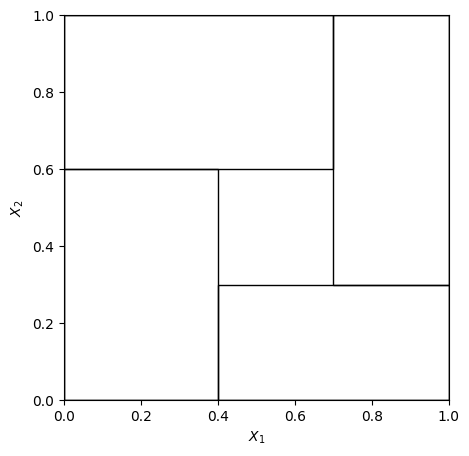

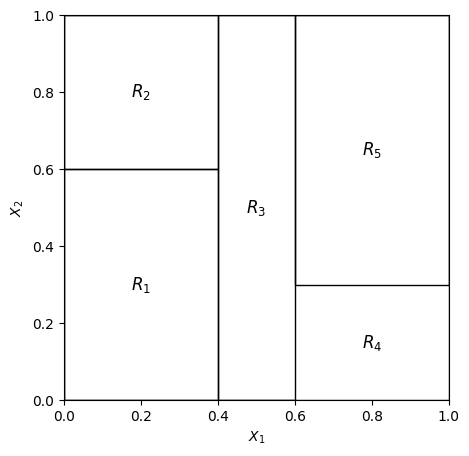

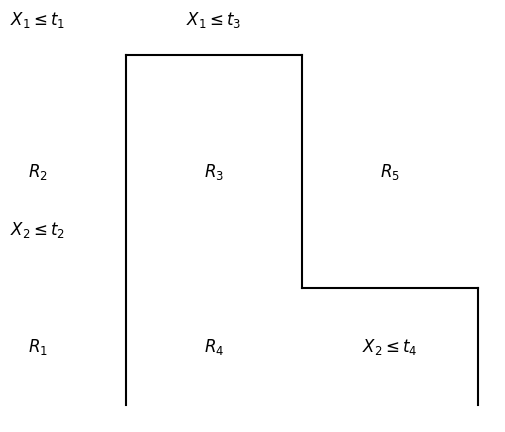

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

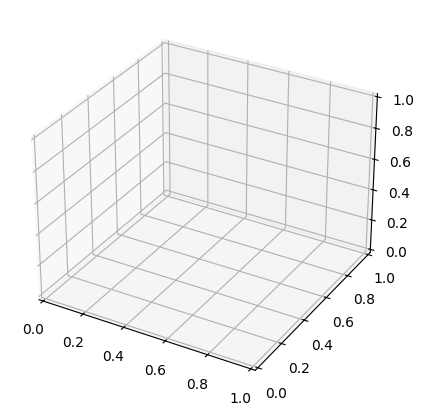

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define colors
colors = ['#FFFFFF', '#D3D3D3', '#808080', '#000000', '#008000', '#0000FF', '#ADD8E6', '#E0FFFF', '#FFFF00', '#FFA500', '#FF8C00', '#800080']

# Top left plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.add_patch(patches.Rectangle((0, 0), 1, 1, fill=None, edgecolor=colors[3]))
ax.add_patch(patches.Rectangle((0, 0), 0.4, 0.6, fill=None, edgecolor=colors[3]))
ax.add_patch(patches.Rectangle((0, 0.6), 0.7, 0.4, fill=None, edgecolor=colors[3]))
ax.add_patch(patches.Rectangle((0.4, 0), 0.6, 0.3, fill=None, edgecolor=colors[3]))
ax.add_patch(patches.Rectangle((0.7, 0.3), 0.3, 0.7, fill=None, edgecolor=colors[3]))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_aspect('equal', 'box')
fig.savefig(OUTPUT_DIR / 'decision_tree_image_1.png')
plt.show()

# Top right plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.add_patch(patches.Rectangle((0, 0), 1, 1, fill=None, edgecolor=colors[3]))
ax.add_patch(patches.Rectangle((0, 0), 0.4, 0.6, fill=None, edgecolor=colors[3]))
ax.add_patch(patches.Rectangle((0, 0.6), 0.4, 0.4, fill=None, edgecolor=colors[3]))
ax.add_patch(patches.Rectangle((0.4, 0), 0.2, 1, fill=None, edgecolor=colors[3]))
ax.add_patch(patches.Rectangle((0.6, 0.3), 0.4, 0.7, fill=None, edgecolor=colors[3]))

ax.text(0.2, 0.3, '$R_1$', ha='center', va='center', fontsize=12)
ax.text(0.2, 0.8, '$R_2$', ha='center', va='center', fontsize=12)
ax.text(0.5, 0.5, '$R_3$', ha='center', va='center', fontsize=12)
ax.text(0.8, 0.15, '$R_4$', ha='center', va='center', fontsize=12)
ax.text(0.8, 0.65, '$R_5$', ha='center', va='center', fontsize=12)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_aspect('equal', 'box')
fig.savefig(OUTPUT_DIR / 'decision_tree_image_2.png')
plt.show()

# Bottom left plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot([0.5, 1], [3, 3], color=colors[3])
ax.plot([0.5, 0.5], [0, 3], color=colors[3])
ax.plot([1, 1], [1, 3], color=colors[3])
ax.plot([1, 1.5], [1, 1], color=colors[3])
ax.plot([1.5, 1.5], [0, 1], color=colors[3])

ax.text(0.25, 3.3, '$X_1 \\leq t_1$', ha='center', va='center', fontsize=12)
ax.text(0.25, 1.5, '$X_2 \\leq t_2$', ha='center', va='center', fontsize=12)
ax.text(0.75, 3.3, '$X_1 \\leq t_3$', ha='center', va='center', fontsize=12)
ax.text(1.25, 0.5, '$X_2 \\leq t_4$', ha='center', va='center', fontsize=12)
ax.text(0.25, 0.5, '$R_1$', ha='center', va='center', fontsize=12)
ax.text(0.75, 0.5, '$R_4$', ha='center', va='center', fontsize=12)
ax.text(0.75, 2, '$R_3$', ha='center', va='center', fontsize=12)
ax.text(1.25, 2, '$R_5$', ha='center', va='center', fontsize=12)
ax.text(0.25, 2, '$R_2$', ha='center', va='center', fontsize=12)

ax.axis('off')
fig.savefig(OUTPUT_DIR / 'decision_tree_image_3.png')
plt.show()

# Bottom right plot - Step function visualization
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Define step function data
X1 = np.linspace(0, 1, 100)
X2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(X1, X2)
Z = np.piecewise(X1, [X1 <= 0.4, X1 > 0.4, X1 > 0.6, X1 > 0.7], [lambda X1: np.piecewise(X2, [X2 <= 0.6], [0.1, 0.2]),
                                                                  lambda X1: np.piecewise(X2, [X2 <= 0.6], [0.3, 0.4]),
                                                                  lambda X1: np.piecewise(X2, [X2 <= 0.3], [0.5, 0.6]),
                                                                  0.7])

ax.plot_surface(X1, X2, Z, color=colors[5], alpha=0.6, edgecolor=colors[3])

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('')

fig.savefig(OUTPUT_DIR / 'decision_tree_image_4.png')
plt.show()